Both for classification and regression

discriminative classification: simply find a line, curve, or manifold that divides the classes from each other
    
more than one possible line that discriminate the classes

Maximizing the margin



In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

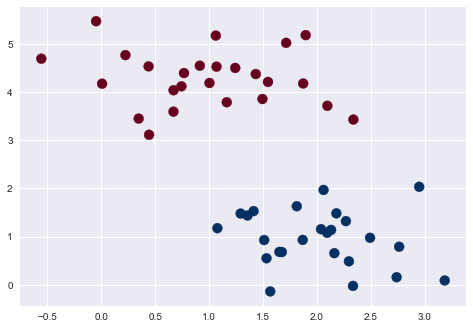

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50,  centers = 2, random_state = 0, cluster_std = 0.6)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 100, cmap='RdBu')

In [10]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

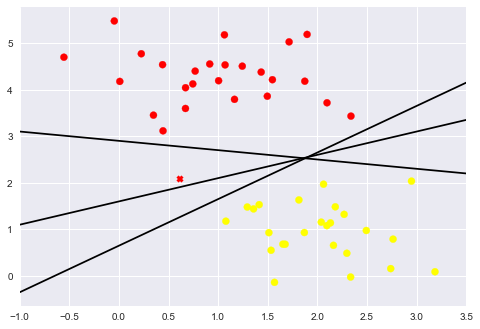

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=3, markersize=5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

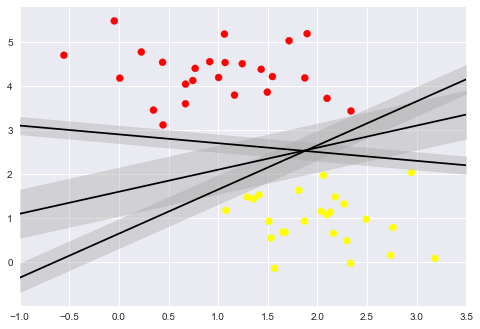

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 3.5);

In [13]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

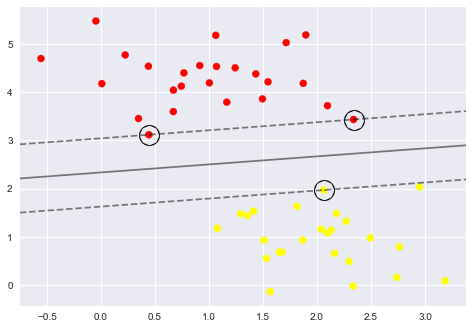

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=1, linewidth=20, facecolors='k');
    
    #print(model.support_vectors_)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
Y.shape
X.shape

In [ ]:
Y[:2]

In [ ]:
X[:2]

In [ ]:
X.ravel().shape

In [ ]:
Y.ravel().shape

In [ ]:
np.vstack([X.ravel(), Y.ravel()]).shape

In [ ]:
xy.shape

In [ ]:
xg = np.linspace(xlim[0], xlim[1], 30)
yg = np.linspace(ylim[0], ylim[1], 30)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P = model.decision_function(xy).reshape(Xg.shape)
P.shape

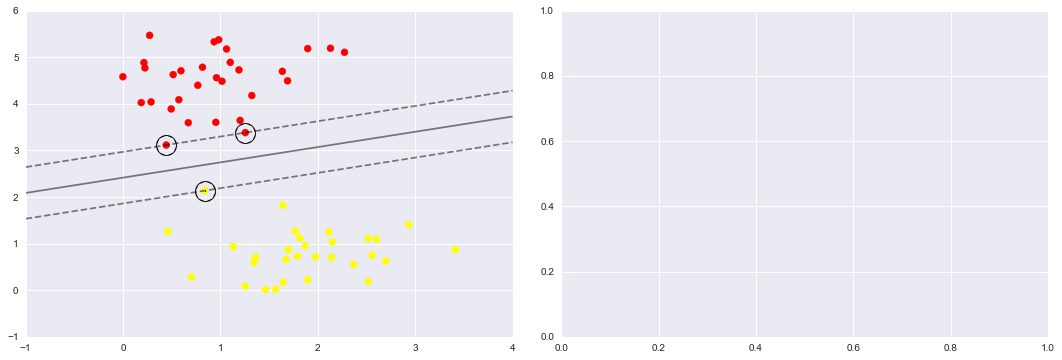

In [16]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    plt.show()
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In [17]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002064ED670F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002064EEAD320>], dtype=object)

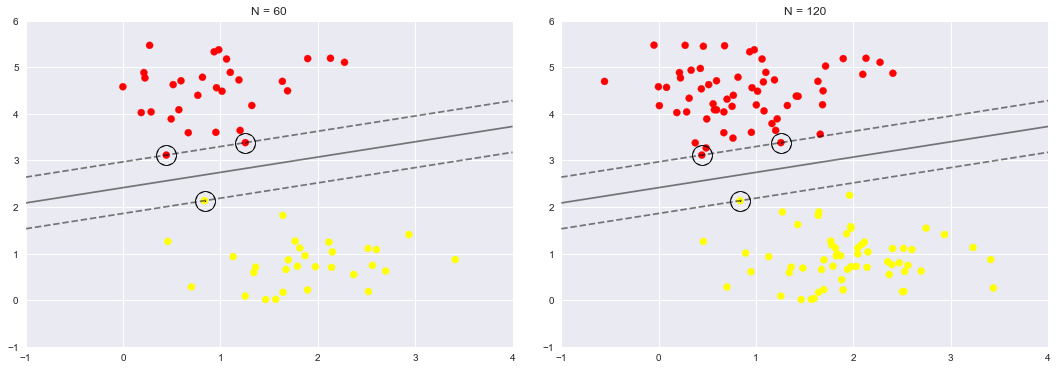

In [18]:
fig

In [19]:
from ipywidgets import interact, fixed
interact(plot_svm, N=range(10,1200,100), ax=fixed(None))


<function __main__.plot_svm>

In [20]:
ax = None
@interact(N=(10,120,10))
def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    plt.show()


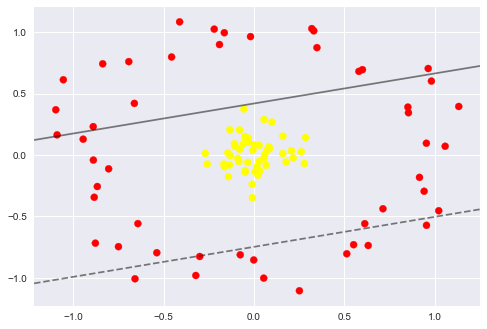

In [21]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [22]:
r = np.exp(-(X ** 2).sum(1))

In [23]:
X.shape

(100, 2)

In [24]:
y[:10].shape

(10,)

In [25]:
len(-(X ** 2).sum(1))

100

In [26]:
r.shape

(100,)

In [28]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=(-90, 90), azip=(-180, 180),X=fixed(X), y=fixed(y));

C:\Users\Gebruiker\Anaconda3\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


In [29]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

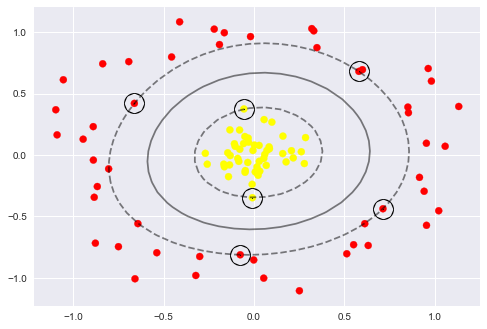

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');

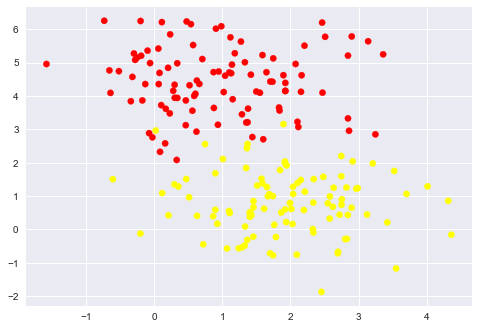

In [48]:
X, y = make_blobs(n_samples=200, centers=2,
random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='autumn');

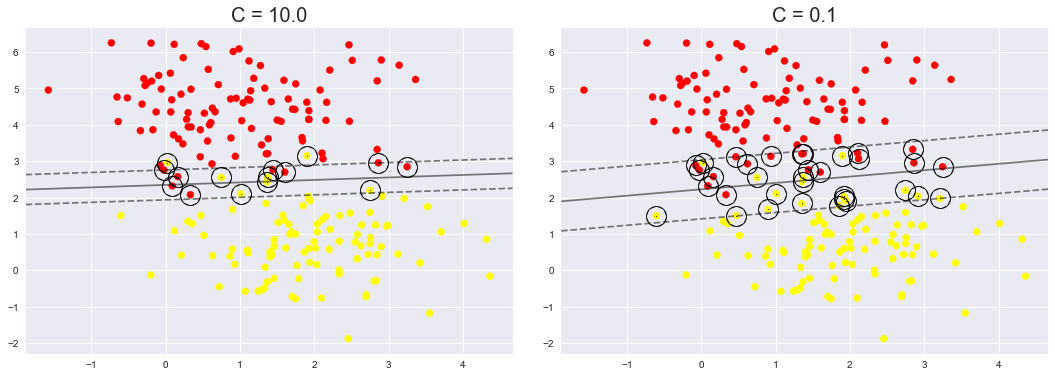

In [59]:
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# big C -> hard constraint
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.set_title('C = {0:.1f}'.format(C), size=20)

In [119]:
# FACE RECOGNITION
from sklearn.datasets import fetch_lfw_people


In [120]:
faces = fetch_lfw_people(min_faces_per_person=60)


In [121]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [122]:
# check data
faces.data.shape

(1348, 2914)

we have 1348 images with each image's size 62x47

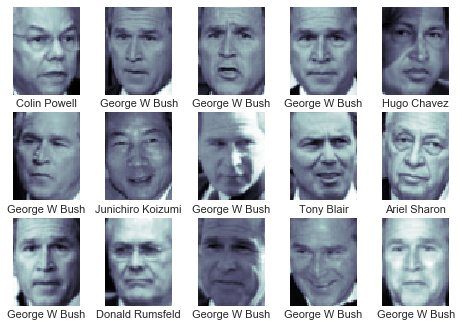

In [123]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
        xlabel=faces.target_names[faces.target[i]])


1348 samples, 62x47 features, we could do the modelling immediately. But transforming it to the lower significant dimension will be more efficient

In [124]:
# import SVC
from sklearn.svm import SVC
# import PCA
from sklearn.decomposition import PCA
# make pipeline
from sklearn.pipeline import make_pipeline
# compressed to 150 features, whiten? random state?
pca = PCA(n_components=200, random_state=42)
# SVC radial basis function , class weight?
svc = SVC(kernel='rbf', class_weight='balanced')
# make pipeline of the model
model = make_pipeline(pca, svc)

In [125]:
# split the dataset to the training and testing set
from sklearn.cross_validation import train_test_split

# split the dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
random_state=42)

In [160]:
from sklearn.grid_search import GridSearchCV
#param_grid = {'svc__C': [1, 5, 10, 50],
param_grid = {'svc__C': [1, 5, 10, 50],
'svc__gamma': [0.00000001, 0.00000005, 0.0000001, 0.0000005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 28.6 s
{'svc__C': 50, 'svc__gamma': 5e-08}


In [161]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

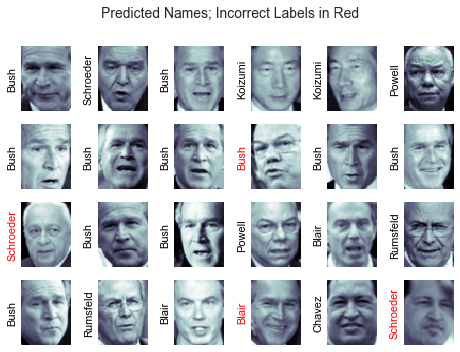

In [162]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
    color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [163]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.67      0.69        15
     Colin Powell       0.84      0.90      0.87        68
  Donald Rumsfeld       0.77      0.77      0.77        31
    George W Bush       0.90      0.85      0.87       126
Gerhard Schroeder       0.73      0.83      0.78        23
      Hugo Chavez       0.87      0.65      0.74        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.84      0.90      0.87        42

      avg / total       0.84      0.84      0.84       337



C:\Users\Gebruiker\Anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\Users\Gebruiker\Anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


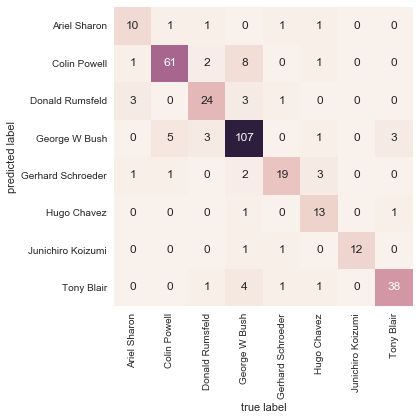

In [164]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [169]:
# 
Bprec = 107/(107+12)
Bprec

0.8991596638655462

In [168]:
Brec = 107/(107+19)
Brec

0.8492063492063492

In [171]:
f1 = 2/(1/Bprec+1/Brec)
f1

0.8734693877551019